# Resultados de Laboratorio

1. Importar resultados. Preparación de data.
2. Definir una función para representar los resultados en gráficas.
3. Presentar los resultados.

In [54]:
import os
import sys
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics

Datasets:


## Importar resultados

In [2]:
def import_file(basePath, filename):
    file = basePath + '/' + filename

    data_import = {}
    with open(file) as json_file:
        data_import = json.load(json_file)

    return data_import

def return_colors(algorithms=[]):
    colors = {
        'rr-bfs-truncated': "#008080",
        'even-gazit': "#FFEFD5",
        'quinca': "#FFFF00",
        'abm': "#FF0000",
        'forest': "#0000FF"
    }
    colors_return = []
    if algorithms:
        for al in algorithms:
            colors_return.append(colors[al])
    else:
        for c in colors:
            colors_return.append(colors[c])
    
    return colors


def read_files(basePath='../lab/results_csv'):
    files = []

    for f in os.listdir(basePath):
        if os.path.isfile(os.path.join(basePath, f)) and f.endswith(".csv"):
            files.append(f)

    data_to_plot = pd.DataFrame()

    for filename in files:
        data_import = pd.read_csv(basePath + "/" + filename) 
        
        data_to_plot = pd.concat([data_to_plot, data_import])
    
    data_to_plot['density'] = round(data_to_plot['density'], 2)
    
    return data_to_plot

## Definir script para gráficas

In [3]:
# Return list with algoruthms fastest
def algorithms_faster(data, fasterNum=3):
    dd = data.groupby('algorithm')['time'].mean().to_frame().sort_values(by=['time'])
    return dd.index.tolist()[:fasterNum]

# Draw seaborn With data.
# Faster (Just include 3 algorithms faster)
# densityGroup (Group by Density)
def draw_plot_seaborn_bar(
    data,
    faster=False,
    densityGroup=True,
    densityValues=[],
    fasterNum=3,
    type_fig='all_algorithms',
    num_nodes=100,
    type_incremental='insert_edge'
): 
    if not faster:
        if densityValues:
            data = data.loc[data['density'].isin(densityValues)]
        if densityGroup:
            sns.barplot(y='algorithm', x='time', data=data, hue="density", capsize=.2, palette=return_colors())
        else:
            sns.barplot(y='algorithm', x='time', data=data, capsize=.2, palette=return_colors())
    else:
        if densityValues:
            data = data.loc[data['density'].isin(densityValues)]
        faster_al = algorithms_faster(data, fasterNum=fasterNum)
        data_filter = data.loc[data['algorithm'].isin(faster_al)]
        
        
            
        if densityGroup:
            if densityValues:
                data_filter = data_filter.loc[data_filter['density'].isin(densityValues)]
            sns.barplot(y='time', x='density', data=data_filter, hue="algorithm", capsize=.2, palette=return_colors())
        else:
            sns.barplot(y='algorithm', x='time', data=data_filter, capsize=.2, palette=return_colors())
    
    #Export to file
    if True:
        path = '../lab/figs/nodes_' + str(num_nodes) + '/' + type_incremental + '/'
        filename = type_fig

        if densityValues:
            last_index = len(densityValues)-1
            filename += "_" + str(densityValues[0]) + "_" + str(densityValues[last_index])
        plt.tight_layout()
        plt.savefig(path + filename + '.png', dpi=150)
    plt.show()
    #draw_plot_seaborn_bar_simple(data_filter_one_calc)

# Draw seaborn simple with data
def draw_plot_seaborn_bar_simple(data): 
    sns.barplot(y='algorithm', x='time', data=data, capsize=.2, palette=return_colors())
    plt.show()

# Draw Group Density
def draw_group_plot(data, num_nodes, type_incremental, densityValues=[], fasterNum=3, generating=1):
    data_filter = data.loc[ (data['nodes'] == num_nodes) & (data['type'] == type_incremental)]
    
    data_filter_one_calc = data_filter.groupby('algorithm')['time'].mean().to_frame()
    data_filter_one_calc['algorithm'] = data_filter_one_calc.index.values
    
    type_fig='faster_algorithms_by_density'
    if generating == 2:
        type_fig='faster_algorithms_by_density_generate_many'
    
    draw_plot_seaborn_bar(
        data_filter,
        faster=True,
        densityGroup=True,
        densityValues=densityValues,
        fasterNum=fasterNum,
        type_fig=type_fig,
        num_nodes=num_nodes,
        type_incremental=type_incremental
    ) 
    
# Draw 3 plot diffetent
def draw_all_plot(data, num_nodes, type_incremental, withGroup=True, densityValues=[], fasterNum=0, generating=1):
    data_filter = data.loc[ (data['nodes'] == num_nodes) & (data['type'] == type_incremental)]
    
    data_filter_one_calc = data_filter.groupby('algorithm')['time'].mean().to_frame()
    data_filter_one_calc['algorithm'] = data_filter_one_calc.index.values
    
    type_fig='all_algorithms'
    if generating == 2:
        type_fig='all_algorithms_generate_many'
    
    #PLOT
    draw_plot_seaborn_bar(
        data_filter,
        faster=True if fasterNum > 0 else False,
        densityGroup=False,
        fasterNum=fasterNum,
        densityValues=densityValues,
        type_fig=type_fig,
        num_nodes=num_nodes,
        type_incremental=type_incremental
    )
    
    


# *RESULTADOS*

Load file from folder:

In [4]:
data = read_files()

# Insert Random Edge (100 nodes)

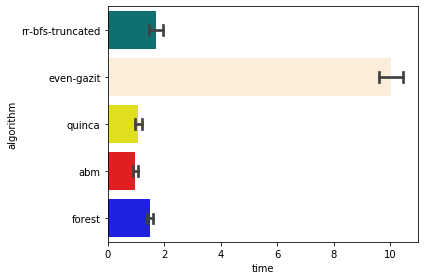

In [5]:
draw_all_plot(data, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

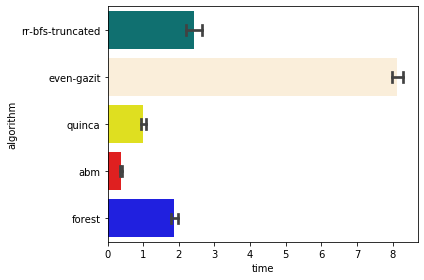

In [6]:
draw_all_plot(data, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5])

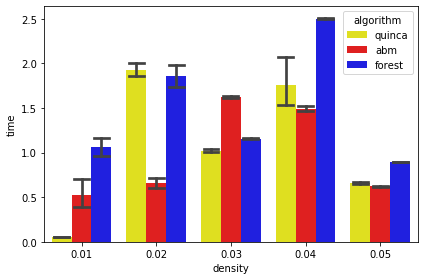

In [7]:
draw_group_plot(data, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

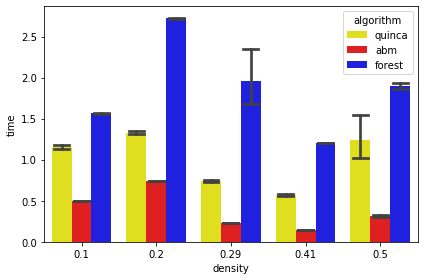

In [8]:
draw_group_plot(data, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5])

# Insert Random Edge (1.000 nodes)

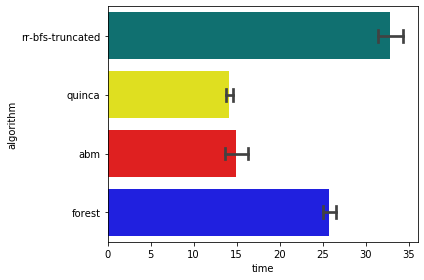

In [9]:
draw_all_plot(data, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], fasterNum=4)

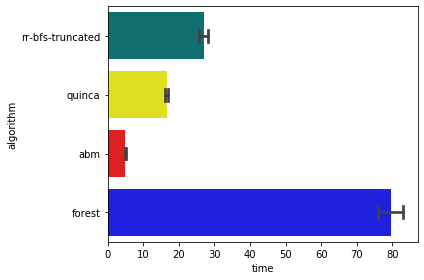

In [10]:
draw_all_plot(data, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], fasterNum=4)

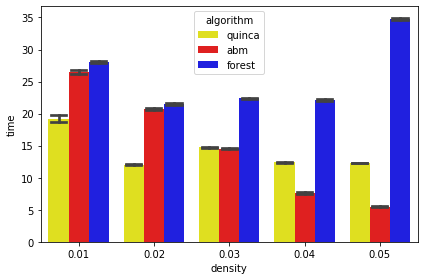

In [11]:
draw_group_plot(data, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

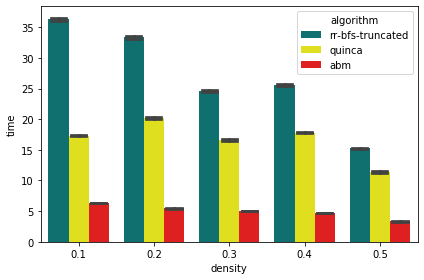

In [12]:
draw_group_plot(data, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Insert Random Edge (2.000 nodes)

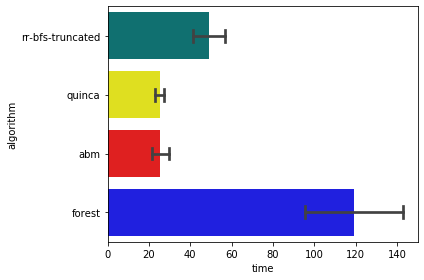

In [13]:
draw_all_plot(data, 2000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], fasterNum=4)

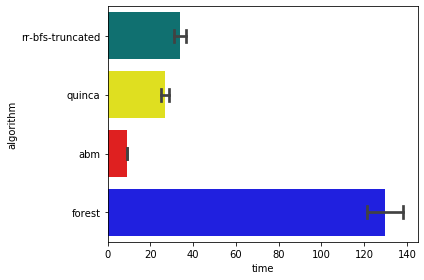

In [14]:
draw_all_plot(data, 2000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], fasterNum=4)

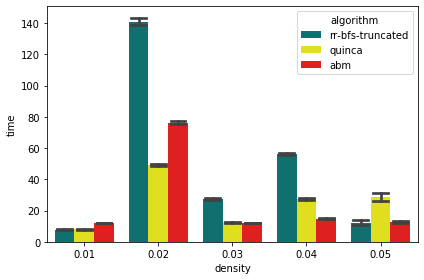

In [15]:
draw_group_plot(data, 2000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

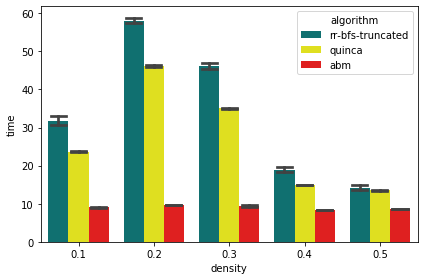

In [16]:
draw_group_plot(data, 2000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Insert Worst Edge (100 nodes)

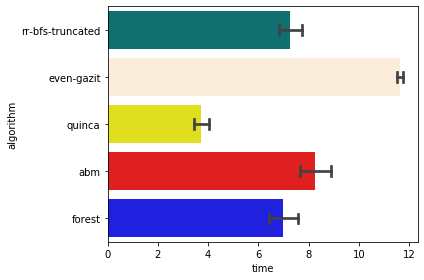

In [17]:
draw_all_plot(data, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

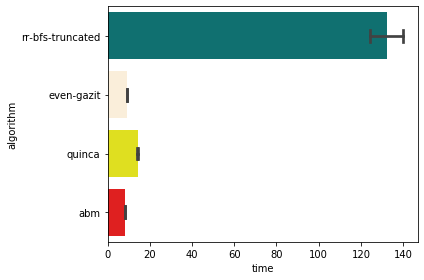

In [18]:
draw_all_plot(data, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.29, 0.39, 0.5], fasterNum=4)

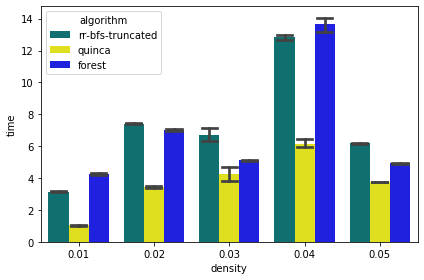

In [19]:
draw_group_plot(data, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

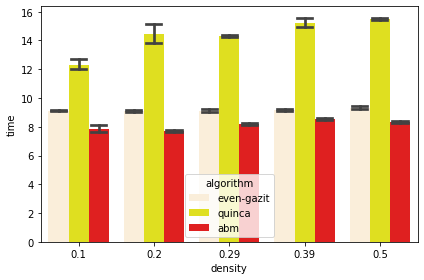

In [20]:
draw_group_plot(data, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.29, 0.39, 0.5])

# Insert Worst Edge (1.000 nodes)

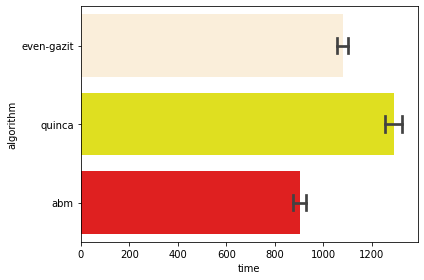

In [21]:
draw_all_plot(data, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], fasterNum=3)

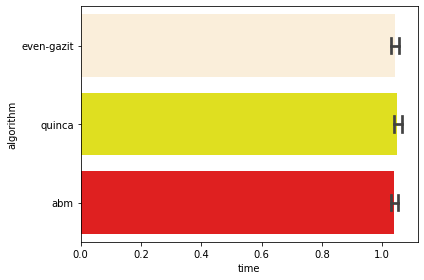

In [22]:
draw_all_plot(data, 1000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], fasterNum=3)

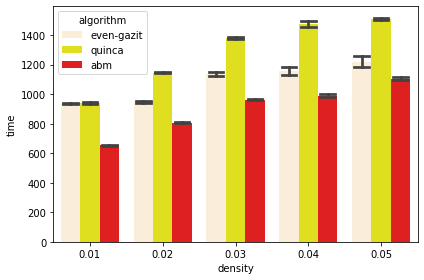

In [23]:
draw_group_plot(data, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

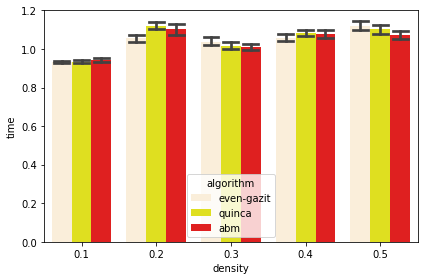

In [24]:
draw_group_plot(data, 1000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Insert Worst Edge (2.000 nodes)

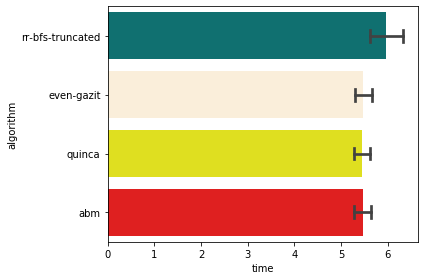

In [25]:
draw_all_plot(data, 2000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], fasterNum=4)

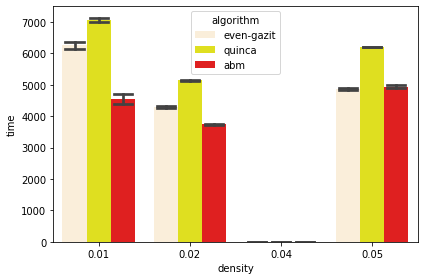

In [26]:
draw_group_plot(data, 2000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.31, 0.04, 0.05])

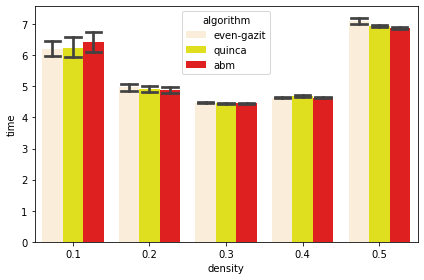

In [27]:
draw_group_plot(data, 2000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5])

# Decrease Random Edge (100 nodes)

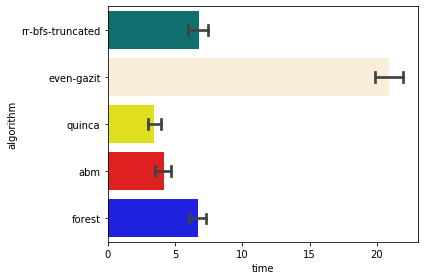

In [28]:
draw_all_plot(data, 100, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

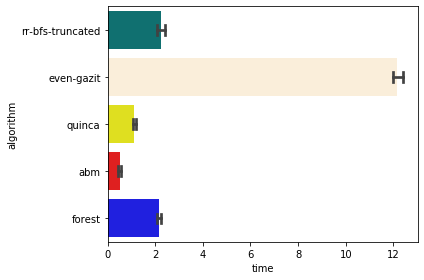

In [29]:
draw_all_plot(data, 100, 'decrease_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5])

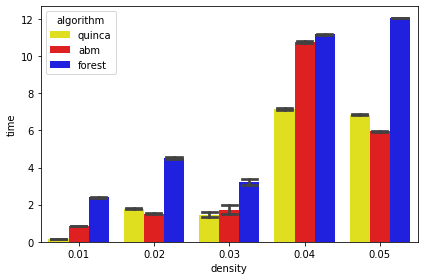

In [30]:
draw_group_plot(data, 100, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

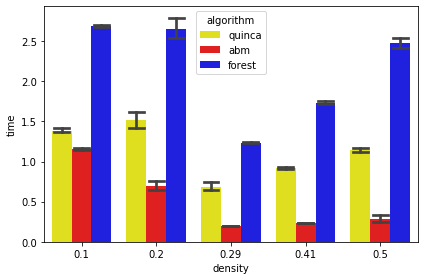

In [31]:
draw_group_plot(data, 100, 'decrease_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5])

# Decrease Random Edge (1.000 nodes)

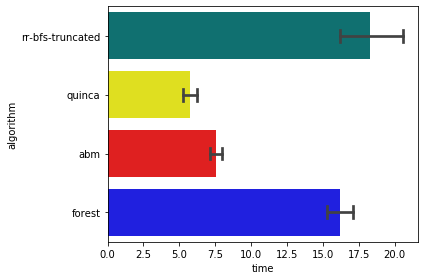

In [32]:
draw_all_plot(data, 1000, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], fasterNum=4)

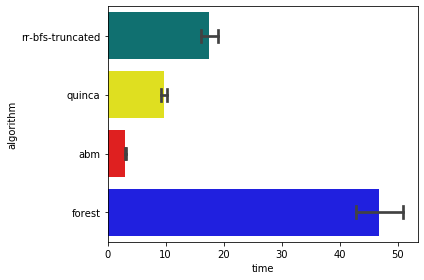

In [33]:
draw_all_plot(data, 1000, 'decrease_edge', densityValues=[0.1, 0.2, 0.29, 0.41, 0.5], fasterNum=4)

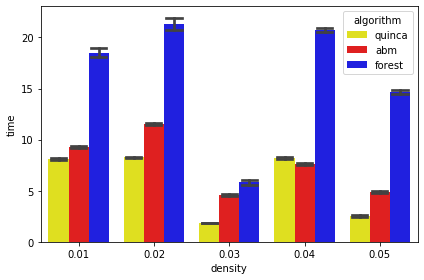

In [34]:
draw_group_plot(data, 1000, 'decrease_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05])

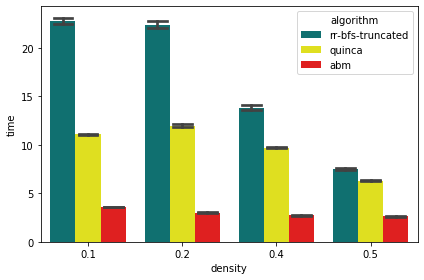

In [35]:
draw_group_plot(data, 1000, 'decrease_edge', densityValues=[0.1, 0.2, 0.4, 0.4, 0.5])

# Decrease Worst Edge (100 nodes)

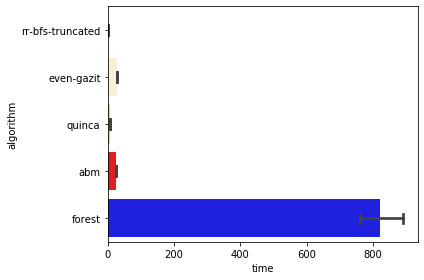

In [36]:
draw_all_plot(data, 100, 'decrease_worst_edge')

--------------------------------------------------------------------------------
# Experiments Generating random

### Create 10 graphs and generate results, try 20 times.

In [37]:
data_random = read_files('../lab/results_many_random')

## Insert Random Edge (100 Nodes)

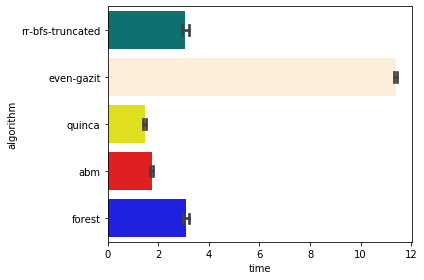

In [38]:
draw_all_plot(data_random, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.03, 0.05], generating=2)

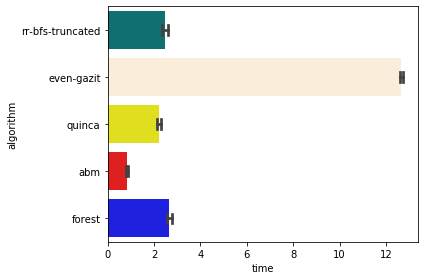

In [39]:
draw_all_plot(data_random, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

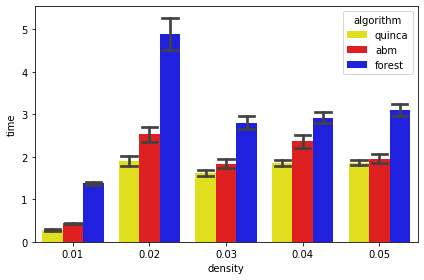

In [40]:
draw_group_plot(data_random, 100, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

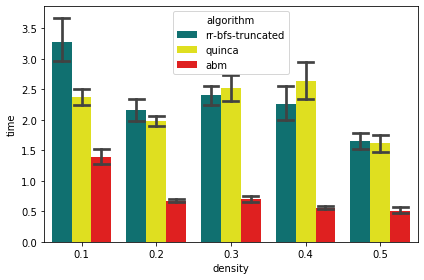

In [41]:
draw_group_plot(data_random, 100, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Insert Random Edge (1.000 Nodes)

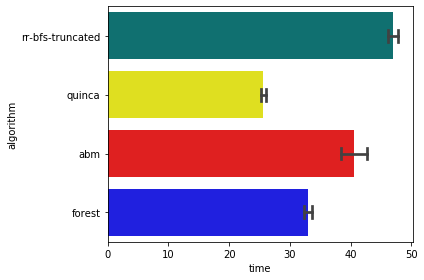

In [42]:
draw_all_plot(data_random, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, fasterNum=4)

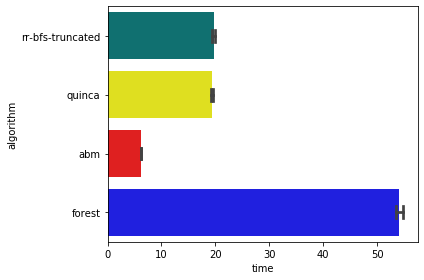

In [43]:
draw_all_plot(data_random, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, fasterNum=4)

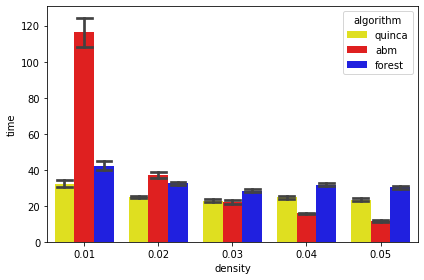

In [44]:
draw_group_plot(data_random, 1000, 'insert_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

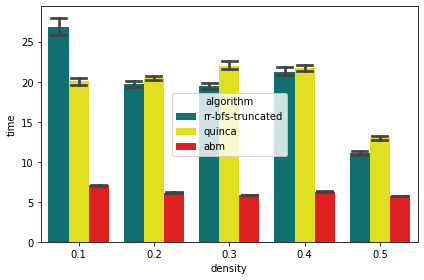

In [45]:
draw_group_plot(data_random, 1000, 'insert_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Insert Worst Edge (100 Nodes)

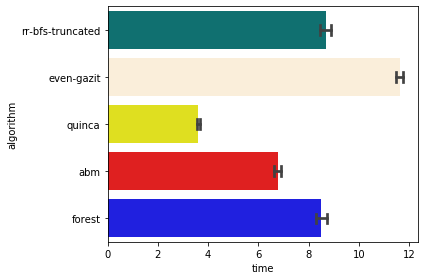

In [46]:
draw_all_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, fasterNum=0)

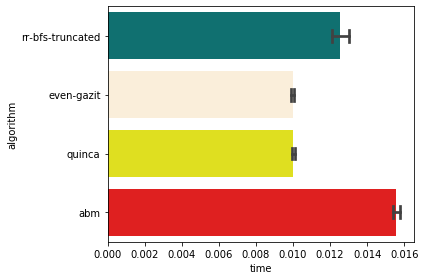

In [47]:
draw_all_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, fasterNum=4)

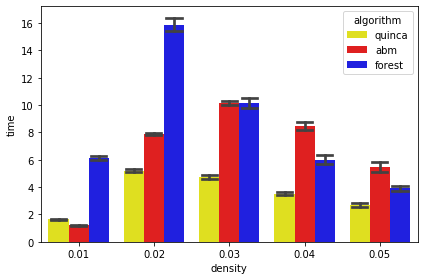

In [48]:
draw_group_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

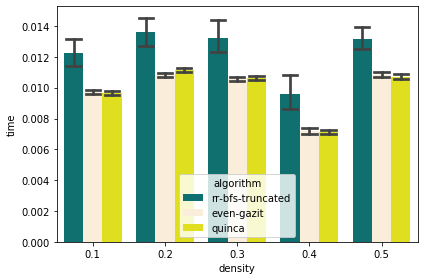

In [49]:
draw_group_plot(data_random, 100, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)

## Insert Worst Edge (1.000 Nodes)

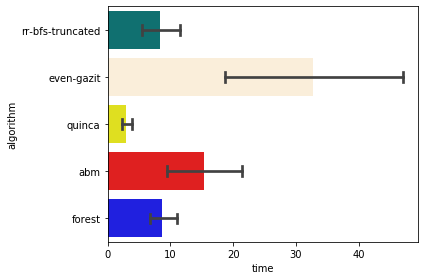

In [50]:
draw_all_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2, fasterNum=0)

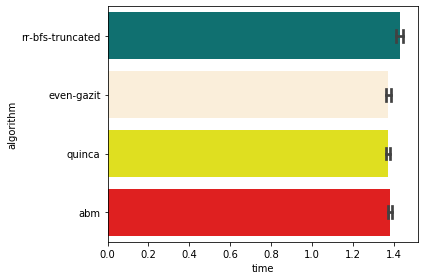

In [51]:
draw_all_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2, fasterNum=4)

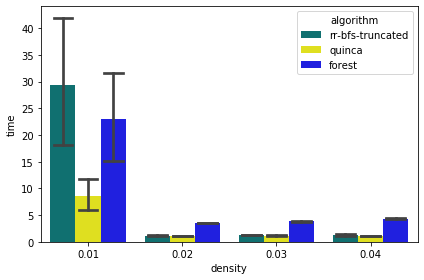

In [52]:
draw_group_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.01, 0.02, 0.03, 0.04, 0.05], generating=2)

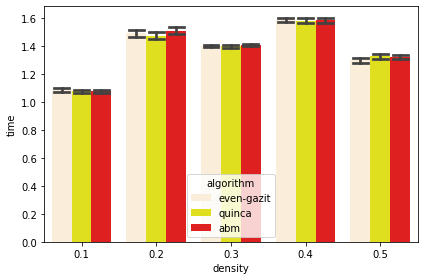

In [53]:
draw_group_plot(data_random, 1000, 'insert_worst_edge', densityValues=[0.1, 0.2, 0.3, 0.4, 0.5], generating=2)